In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/NFLX.csv")

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [ ]:
viz = df.copy()

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.shape

(1009, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [ ]:
train, test = train_test_split(df, test_size = 0.2)

In [ ]:
test_pred = test.copy()

In [ ]:
train.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
358,2019-07-10,382.769989,384.339996,362.679993,381.000000,381.000000,5878800
129,2018-08-09,347.959991,352.440002,345.820007,349.359985,349.359985,4820300
742,2021-01-15,500.000000,506.320007,495.100006,497.980011,497.980011,5895800
298,2019-04-12,360.690002,361.750000,349.359985,351.140015,351.140015,15646200
509,2020-02-13,376.959991,385.369995,376.510010,381.399994,381.399994,4485400
12,2018-02-22,283.880005,284.500000,274.450012,278.140015,278.140015,8891500
545,2020-04-06,365.220001,380.290009,361.709991,379.959991,379.959991,8183900
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
342,2019-06-17,342.690002,351.769989,342.059998,350.619995,350.619995,5358200
594,2020-06-16,425.760010,437.959991,425.179993,436.130005,436.130005,5507900


In [ ]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
589,2020-06-09,421.649994,434.730011,420.309998,434.049988,434.049988,6797000
449,2019-11-15,290.589996,295.820007,287.570007,295.029999,295.029999,6333800
10,2018-02-20,277.739990,285.809998,276.609985,278.549988,278.549988,7769000
946,2021-11-05,663.969971,665.640015,645.010010,645.719971,645.719971,5277400
295,2019-04-09,360.540009,366.739990,359.000000,364.709991,364.709991,5439200
140,2018-08-24,346.000000,359.149994,344.540009,358.820007,358.820007,14729100
325,2019-05-22,358.010010,370.459991,357.299988,359.730011,359.730011,6229400
107,2018-07-10,417.239990,419.440002,413.079987,415.630005,415.630005,9382900
272,2019-03-07,360.160004,362.859985,350.500000,352.600006,352.600006,6151300
339,2019-06-12,351.820007,353.609985,343.230011,345.559998,345.559998,4584700


In [ ]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [ ]:
y_train = train['Close'].values
y_test = test['Close'].values

In [ ]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

NameError: name 'LinearRegression' is not defined

In [ ]:
y_pred = model_lnr.predict(x_test)

In [ ]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.6007237]


In [ ]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))


MSE 21.894
RMSE 4.679
MAE 3.259
MAPE 0.008
R2 Score :  0.998


In [ ]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [ ]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [ ]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


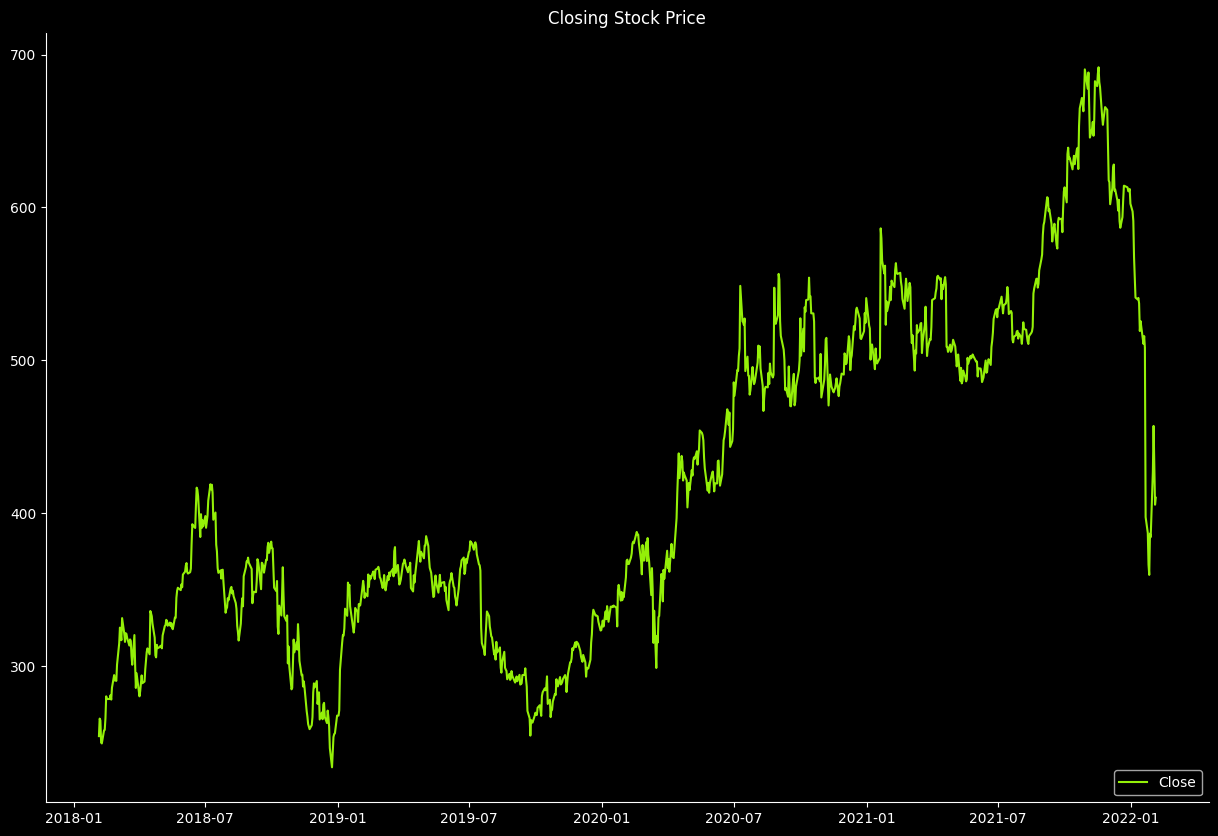

In [ ]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

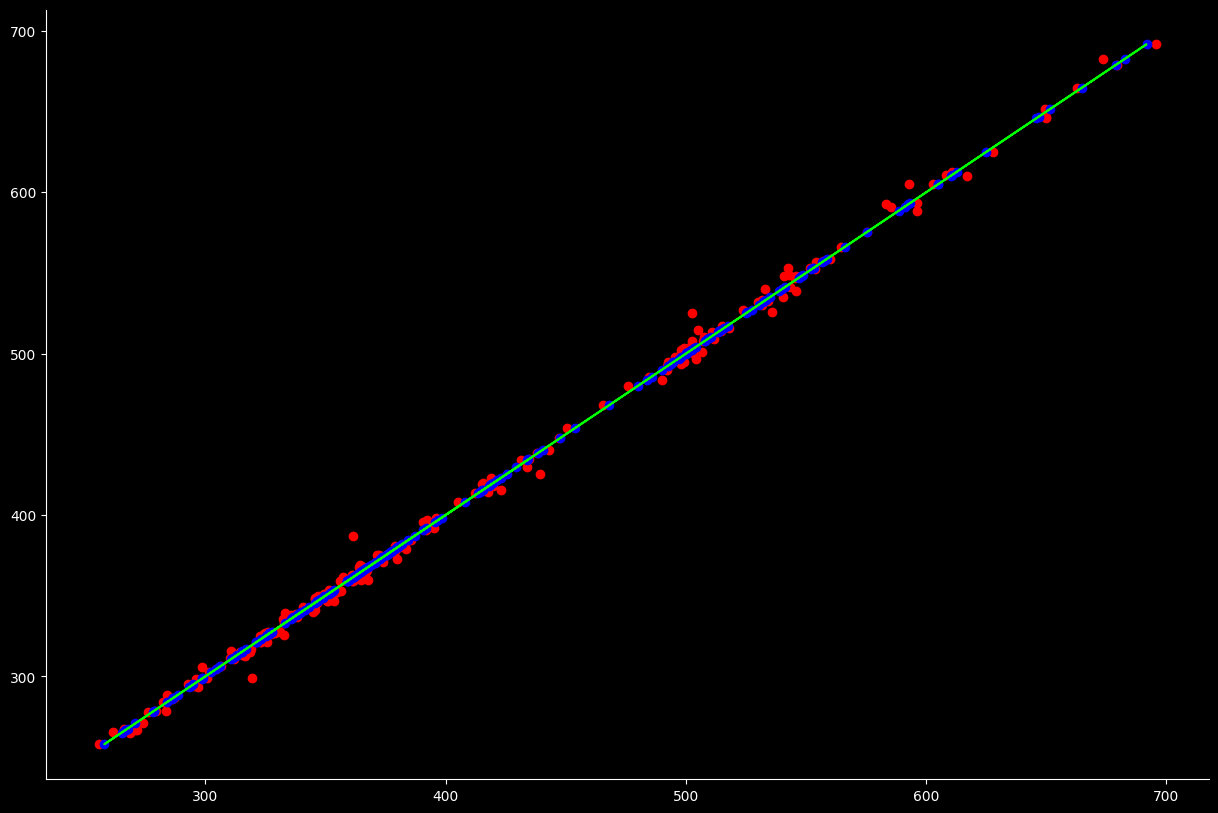

In [ ]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [ ]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
589,2020-06-09,421.649994,434.730011,420.309998,434.049988,434.049988,6797000,431.388631
449,2019-11-15,290.589996,295.820007,287.570007,295.029999,295.029999,6333800,292.720881
10,2018-02-20,277.739990,285.809998,276.609985,278.549988,278.549988,7769000,283.795581
946,2021-11-05,663.969971,665.640015,645.010010,645.719971,645.719971,5277400,649.767708
295,2019-04-09,360.540009,366.739990,359.000000,364.709991,364.709991,5439200,364.574283
...,...,...,...,...,...,...,...,...
617,2020-07-20,489.140015,504.500000,484.200012,502.410004,502.410004,11940300,497.975703
64,2018-05-08,325.899994,327.350006,323.049988,326.890015,326.890015,4735700,325.035100
947,2021-11-08,650.289978,656.000000,643.789978,651.450012,651.450012,2887500,649.496464
482,2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,332.504705


In [ ]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,418.408861,105.351773,257.950012,338.237487,378.345001,506.895005,691.690002
Close_Prediction,202.0,418.260183,104.810232,255.745877,336.049809,378.827899,504.221099,695.535649


In [ ]:
from IPython.display import IFrame

# URL of your published Flourish chart
flourish_url = "https://public.flourish.studio/visualisation/20279753/"

# Embedding the chart using IFrame
IFrame(src=flourish_url, width=800,height=600)

In [ ]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [ ]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-06,265.720001,261.491378
2018-02-07,NaN,NaN
2018-02-08,NaN,NaN
2018-02-09,NaN,NaN
2018-02-10,NaN,NaN
...,...,...
2022-01-29,NaN,NaN
2022-01-30,NaN,NaN
2022-01-31,NaN,NaN


In [ ]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
